In [1]:
#WAP to load the titanic dataset, preprocess the data, train Logistic Regression and Decision Tree models to predict passenger survival, and evaluate the models using accuracy, precision, recall, and F1 Score.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
train_titan = pd.read_csv(r"C:\Users\Lokesh Patra\Documents\Data Science\Jupyter Notebooks\Titanic.csv")

In [4]:
train_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
train_titan['Sex'] = train_titan['Sex'].map({'male': 1, 'female': 0})

train_titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [8]:
train_titan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

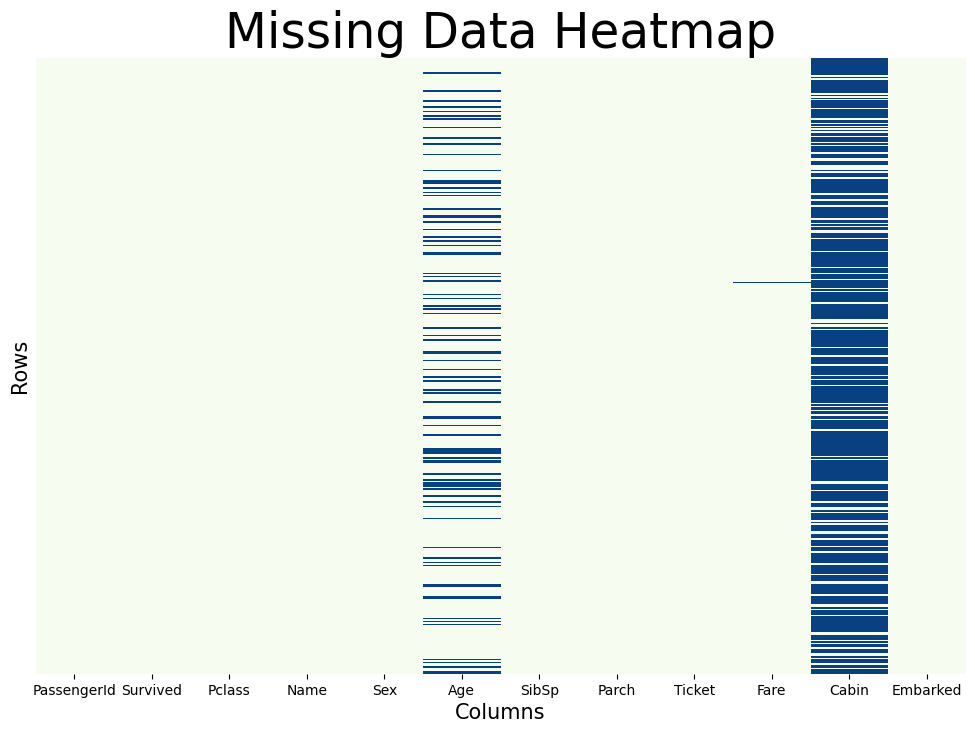

In [9]:
# Create a boolean DataFrame indicating missing values
missing_data = train_titan.isnull()

# Create a heatmap of the missing data
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap="GnBu", cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap', fontsize=35)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Rows', fontsize=15)
plt.show()

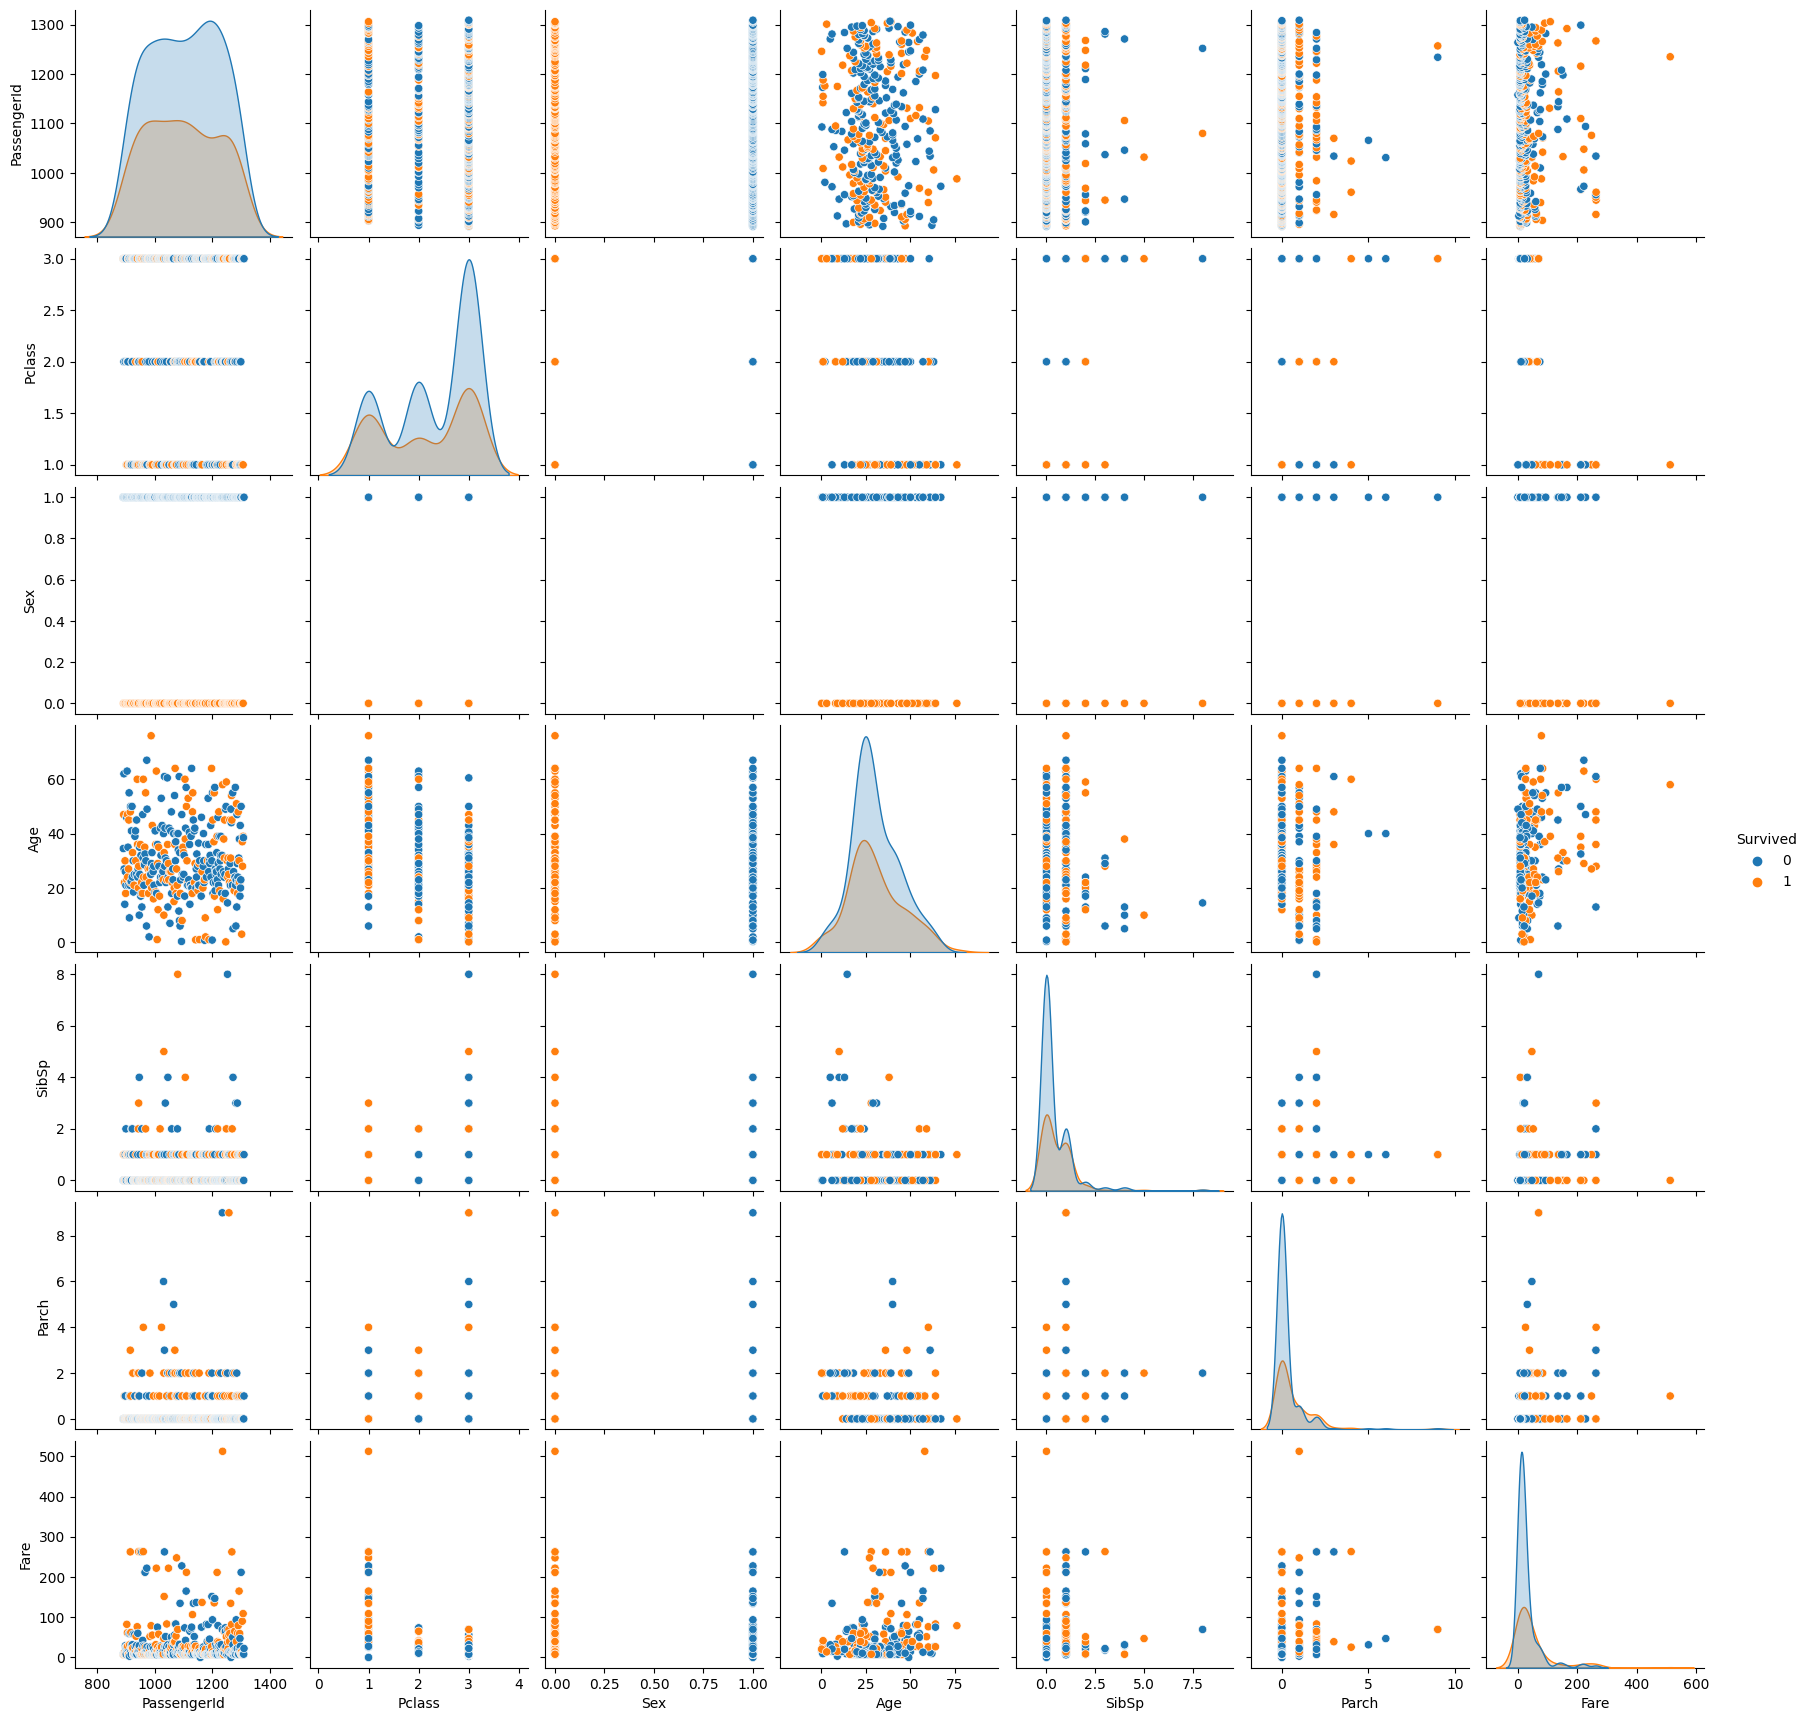

In [10]:
sns.pairplot(train_titan, hue='Survived')
plt.show()

In [11]:
train_titan.fillna(30.2 , inplace=True)

In [12]:
train_titan.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

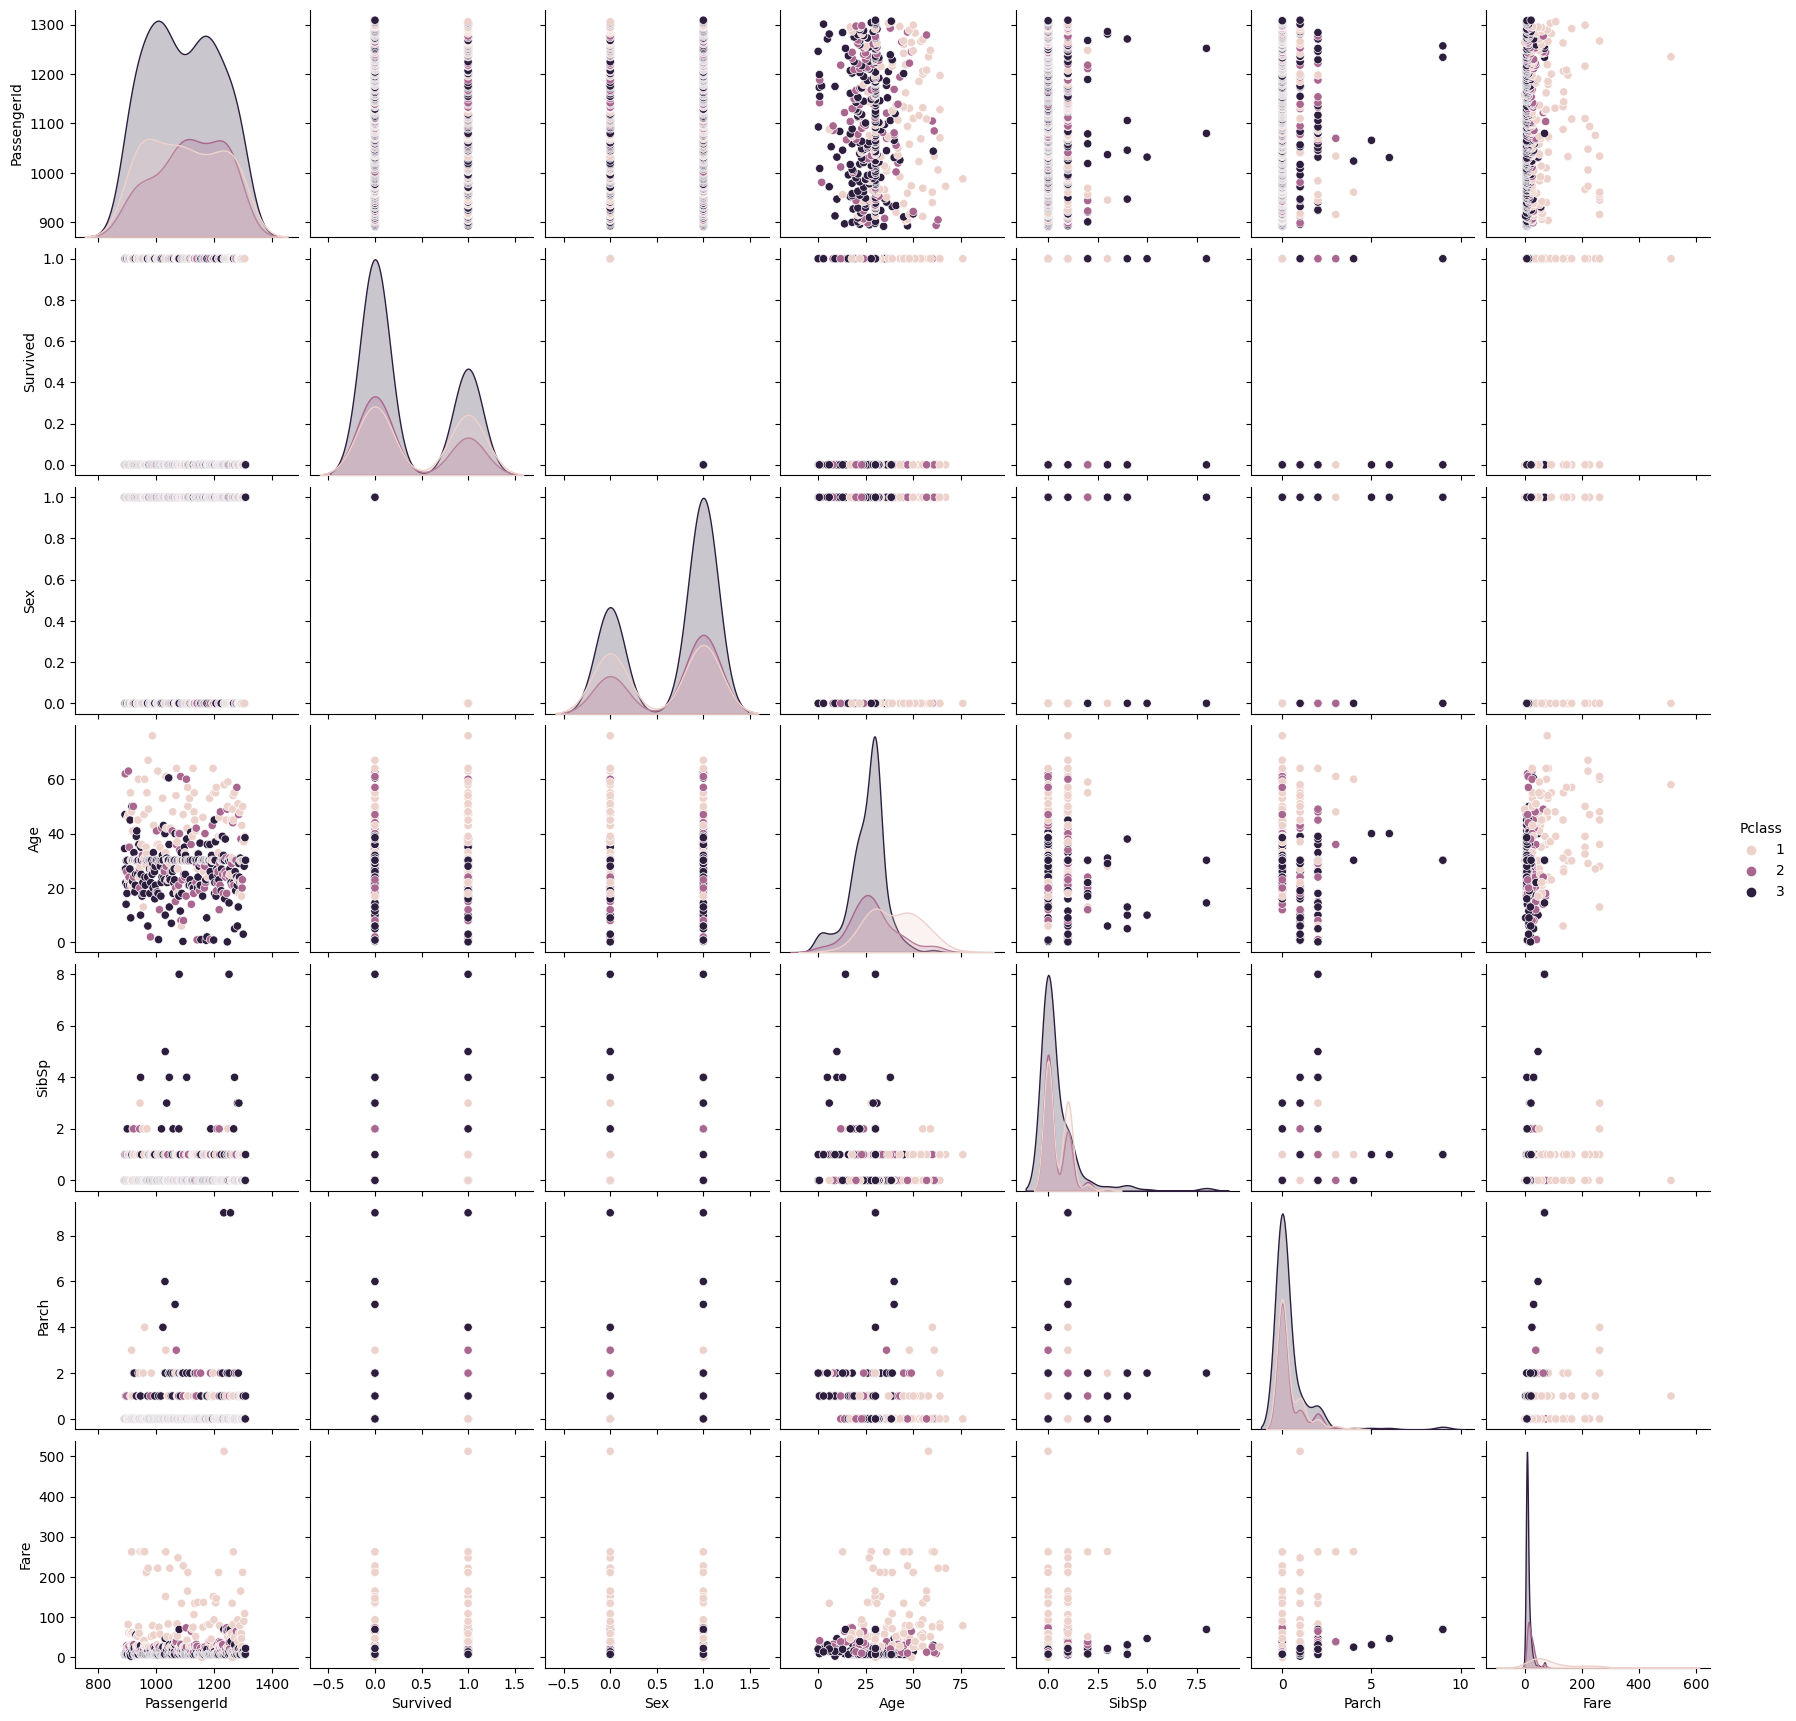

In [13]:
sns.pairplot(train_titan, hue='Pclass')
plt.show()

In [14]:
len(train_titan)

418

In [17]:
# Preprocessing
X = train_titan.drop(columns=['Survived', 'Name', 'Ticket'], errors='ignore')
y = train_titan['Survived']
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

X[categorical_cols] = X[categorical_cols].astype(str)
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded_cat = encoder.fit_transform(X[categorical_cols])
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(X[numerical_cols])
X_processed = np.hstack((X_scaled_num, X_encoded_cat))

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
train_accuracy_dt = accuracy_score(y_train, decision_tree.predict(X_train))
test_accuracy_dt = accuracy_score(y_test, decision_tree.predict(X_test))
print('Decision Tree - Train Accuracy: {:.2f}'.format(train_accuracy_dt))
print('Decision Tree - Test Accuracy: {:.2f}'.format(test_accuracy_dt))
print("---------------------------------------------------------------------")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Cross-Validation Scores
dt_scores = cross_val_score(decision_tree, X_processed, y, cv=5)
lr_scores = cross_val_score(log_reg, X_processed, y, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Logistic Regression Cross-Validation Scores:", lr_scores)

# Model Evaluation
models = [("Decision Tree", decision_tree.predict(X_test)), ("Logistic Regression", log_reg_pred)]
for name, pred in models:
    print("---------------------------------------------------------------------")
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))

# Accuracy DataFrame
accuracy_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'Accuracy (%)': [accuracy_score(y_test, pred) * 100 for _, pred in models]
}).sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True)

accuracy_df

Decision Tree - Train Accuracy: 1.00
Decision Tree - Test Accuracy: 1.00
---------------------------------------------------------------------
Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Logistic Regression Cross-Validation Scores: [1. 1. 1. 1. 1.]
---------------------------------------------------------------------
Model: Decision Tree
Accuracy: 100.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

---------------------------------------------------------------------
Model: Logistic Regression
Accuracy: 100.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0 

,Model,Accuracy (%)
0,Decision Tree,100.0
1,Logistic Regression,100.0
